In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, Aer, execute

# Revisting the H Gate

We saw how the H gate rotates rotates 180 degrees around the XY diagonal:

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/h_gate.gif?raw=true" width=20%>

But we never discussed the implications of this, or any of the gates for this matter...

## Today we will discuss:
1. Implications of the H gate rotation
2. Superpositions
3. Measurement and State collapse
4. Quantum Computers as an extension of Classical Computers

# H Gate Rotations

#### Looking again at the position of the arrow on the block sphere:
Unlike the X and Y gates, the H gate lands our arrow perfectly in between the $|0\rangle$ and $|1\rangle$ poles of the sphere.

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/h_gate.gif?raw=true" width=20%>

# It's time we talked about what the bloch sphere is actually representing
The bloch sphere can represent every state of a single qubit. 

In it's most simple form, a quantum state is just a linear combination of the **$|0\rangle$ and $|1\rangle$ states**.

#### Linear Combination
Think of a compass, if **North** and **East** are our two states, a linear combination of the two would be **Northeast**.

Sometimes you might want to walk more **North** than **East**, maybe 2 miles **North** and 1 mile **East**. 
The resultant position still just combination of **North** and **East**, just with more North in the mixture.

## Combining two states:
Using the North and East analogy, we can now go back to our qubit

When we apply the H gate it's like we have a mixture of $|0\rangle$ and $|1\rangle$.

# And thats a *Superposition*

It's as simple as a mixture of two things

# There's always a BUT..

The caveat here is **measurement**.

We mentioned in the before that in a quantum measurement states will collapse into one of the possible outcomes.

Qubits are no different, if they are in a superposition they will collapse into $|0\rangle$ or $|1\rangle$.

# Simulating a Fair coin in Python

In [40]:
# Fair Coin
def fair_coin():
    coin_flip = np.random.randint(2)
    if bool(coin_flip):
        return "H"
    else:
        return "T"

In [46]:
fair_coin()

'H'

In [24]:
def draw_histogram(ls):
    l = pd.Series(ls).value_counts().to_dict()
    return plot_histogram(l)

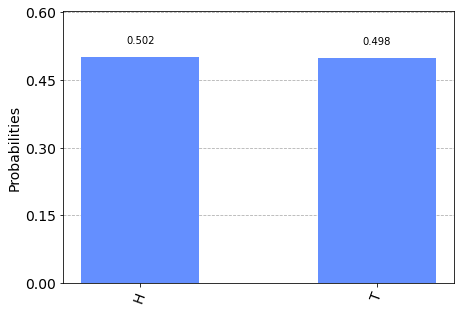

In [48]:
ls = [fair_coin() for _ in range(1000)]
draw_histogram(ls)

### Now suppose instead we wanted our coin to be biased with a 1/8 probability
Think of this as creating a superposition of more Tails than Heads.

This is signifiganty trickier, we now need to flip the coin multilple times just to simulate a different mixture of Heads and Tails.

In [51]:
# Biased coin
def biased_coin_in8(actual_number_flips=0):
    flip_3 = tuple([fair_coin() for _ in range(3)])
    actual_number_flips += 3
    biased_heads = {("H","H","H")}
    reflip = {("T","T","T")}
    if flip_3 in biased_heads:
        return (actual_number_flips,"H")
    elif flip_3 in reflip:
        return biased_coin_in8(actual_number_flips)
    else:
        return (actual_number_flips,"T")

In [52]:
def num_biased_flips(num):
    total_number = 0
    ls = []
    for _ in range(num):
        flips, res = biased_coin_in8()
        ls.append(res)
        total_number += flips
    return total_number, ls

actual_number_flips: 3516


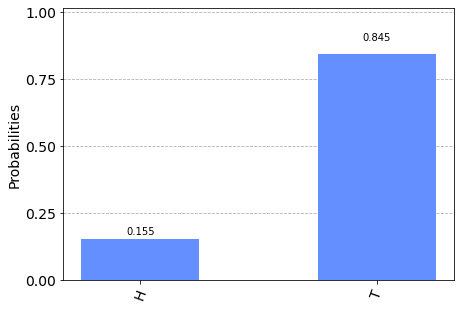

In [53]:
actual_number_flips, bls = num_biased_flips(1000)
print(f"actual_number_flips: {actual_number_flips}")
draw_histogram(bls)

# Now let's see how the Quantum Computer can do the same thing

Remember, it is built on principles of randomness - can it deal with this more elegantly?

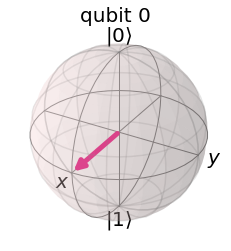

In [55]:
qc = QuantumCircuit(1)
qc.h(0)
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))
qc.measure_all()

## Simulate and Draw

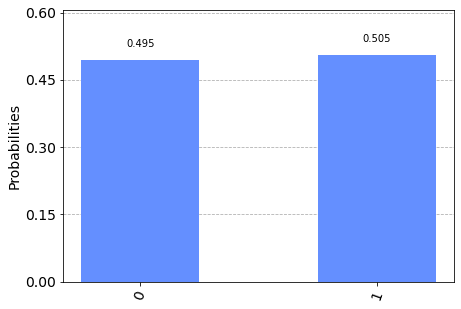

In [56]:
backend = Aer.get_backend('qasm_simulator') # Choosing the simulator we want to use
job = execute(qc, backend, shots = 1000) # Running the simulator - specifying the circuit we want to simulate and the number of times we want to simulate it (shots)
result = job.result() # Getting the result from the simulator
counts = result.get_counts()
plot_histogram(counts)

## For the biased coin:
Note this is not about the amount code required,
It's really about the amount of `measurements` required

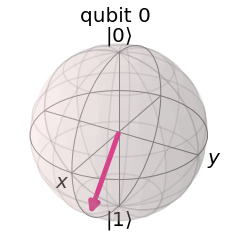

In [64]:
qc = QuantumCircuit(1)
qc.h(0)
qc.ry(0.848,0)
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))
qc.measure_all()

## Simulate and Draw

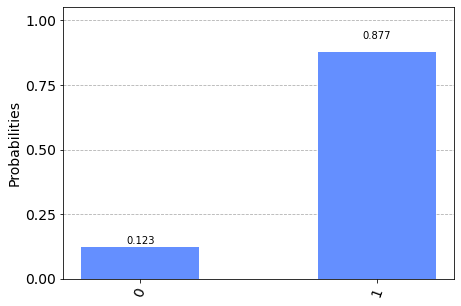

In [65]:
backend = Aer.get_backend('qasm_simulator') # Choosing the simulator we want to use
job = execute(qc, backend, shots = 1000) # Running the simulator - specifying the circuit we want to simulate and the number of times we want to simulate it (shots)
result = job.result() # Getting the result from the simulator
counts = result.get_counts()
plot_histogram(counts)

# Why is this important?

The world is full of random events, and almost none of them have convenient probability distributions

# Additional Coding session
Creating states!

### Create the 0 State

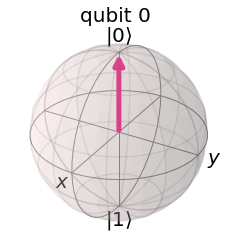

In [67]:
qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))
qc.measure_all()

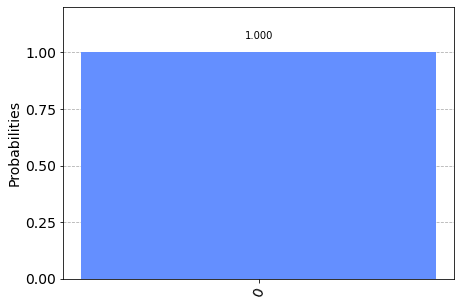

In [68]:
backend = Aer.get_backend('qasm_simulator') # Choosing the simulator we want to use
job = execute(qc, backend, shots = 1000) # Running the simulator - specifying the circuit we want to simulate and the number of times we want to simulate it (shots)
result = job.result() # Getting the result from the simulator
counts = result.get_counts()
plot_histogram(counts)

### Create the 1 State

### Create the + State

### Create the - State